In [355]:
import pandas as pd
import numpy as np
import tweepy 
import requests 
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Gathering Data 
- 'twitter-archive-enhanced.csv' : Downloaded Manually .
- 'image_predictions.tsv' : To be downloaded programmaticly from url : https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- 'tweet_json.txt' : Query the Twitter API for each tweet's JSON data using Python's Tweepy .
- Read each line in 'tweet_json.txt' and load it to json data , then extract tweet_id , Favorite_count and retweet_count 
- Build data frames for Gathered files . 
- Output :Data Frames of twitter_archive , image_prediction and df_tweets 

In [356]:
#Read 'twitter-archive-enhanced.csv' and load it into twitter_archive df  
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [357]:
#Download 'image_predictions' from url and save it to TSV file using requests 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
r=requests.get(url)
if not os.path.isfile(file_name) :
    with open(file_name,'wb') as f:
        f.write(r.content)

In [358]:
#Load TSV file to image_prediction df
image_prediction = pd.read_csv('image-predictions.tsv',sep='\t')

In [359]:
#Query the Twitter API for each tweet id in Twitter Archive and load json tweet to TXT file
#Keys and Tokens are hidden to compy with twitter terms and conditions 
tweet_fails = {}
count=0
consumer_key =  'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_token_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#create txt file to write on it
if not os.path.isfile('tweet_json.txt') :
    with open('tweet_json.txt','w') as file :
        for tweet_id in twitter_archive['tweet_id'] :
            count+=1
            print(str(count)+':'+str(tweet_id))
            try :
                tweet = api.get_status(tweet_id,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,tweet_mode='extended')
                print('success')
                json.dump(tweet._json,file)
                file.write('\n')
            except tweepy.TweepError as e :
                print('fail')
                tweet_fails[tweet_id]=e
                pass
print(tweet_fails)
                
            
            
            


{}


In [360]:
#create list of dictionaries 
df_list=[]
#Read each line in 'tweet_json.txt' and load it into json data 
with open('tweet_json.txt') as f :
    for line in f :
        data=json.loads(line)
        tw_id=data['id']
        favorite_count=data['favorite_count']
        retweet_count=data['retweet_count']
        df_list.append({'tweet_id':tw_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
#Load Data of Tweet'id , Favorite_counta and retweet count into Data Frame
df_tweets=pd.DataFrame(df_list, columns=['tweet_id','favorite_count','retweet_count'])

## Assessing Data


In [361]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [362]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [363]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [364]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None
439,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
1839,675891555769696257,NaN,NaN,2015-12-13 04:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675891555...,6,10,Donny,None,None,None,None
587,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,None,None
1636,684200372118904832,NaN,NaN,2016-01-05 02:30:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Gang of fearless hoofed puppers here. Straight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684200372...,6,10,None,None,None,None,None


In [365]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Flurpson      1
Lipton        1
Tug           1
Derby         1
Margo         1
Name: name, Length: 957, dtype: int64

In [366]:
name_a=twitter_archive.query('name=="a"')
name_a

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [367]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [368]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [369]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [370]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [371]:
invalid_numerator=twitter_archive.query('rating_numerator<6 or rating_numerator>15')
invalid_numerator.rating_numerator.value_counts()

5       37
3       19
4       17
1        9
2        9
0        2
420      2
75       2
143      1
144      1
17       1
20       1
24       1
666      1
27       1
121      1
1776     1
44       1
45       1
50       1
182      1
60       1
960      1
204      1
80       1
84       1
88       1
99       1
26       1
165      1
Name: rating_numerator, dtype: int64

In [372]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


##### Rating Columns Notice
-- After Check sample of those Tweets's photos i have notice that some of them if photo has more that 1 dog , it seems denomiator 10 muliplied by number of dogs so as numerator 

In [373]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [374]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [375]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [376]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [377]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [378]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
binoculars              1
tailed_frog             1
beach_wagon             1
bearskin                1
revolver                1
Name: p1, Length: 378, dtype: int64

In [379]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
paper_towel             1
platypus                1
crutch                  1
saltshaker              1
spindle                 1
Name: p2, Length: 405, dtype: int64

In [380]:
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
maraca                 1
great_grey_owl         1
bow                    1
Sussex_spaniel         1
tripod                 1
Name: p3, Length: 408, dtype: int64

In [381]:
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [382]:
df_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35460,7485
1,892177421306343426,30695,5557
2,891815181378084864,23088,3680
3,891689557279858688,38744,7664
4,891327558926688256,37023,8266


In [383]:
df_tweets.tail()

,tweet_id,favorite_count,retweet_count
2326,666049248165822465,96,40
2327,666044226329800704,264,125
2328,666033412701032449,109,39
2329,666029285002620928,119,41
2330,666020888022790149,2358,453


In [384]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Qulaity
#### `twitter_archive` Table
- 'tweet_id' type is int instead of string
- None Values instead of NAN values in columns 'name', doggo,floofer,pupper and puppo
- Invalid data in column 'name' : names with lowercase! . 
- According to project specs there is values in columns that is not needed : 'in_reply_to_status_id' , 'in_reply_to_user_id ' ,'retweeted_status_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp'  
- 'timestamp' data type 'object'
- Inaccurate data in 'rating_numerator' 
- 'rating_numerator' data type int while there text rows include float numbers .
- - Outliers in columns 'rating_numerator' & 'rating_denominator'
- There is tweets has no image in image_prediction data-set 


#### `image_prediction` Table
- 'tweet_id' type is int instead of string
- Columns header naming 'p1' ,'p1_conf' and so on need to be clear 
- Missing Predictions values for tweet_id in twitter_archive_enhanced data set
- 9 columns in image_prediction for 'p\*', 'p\*_conf' ,'p*_dog'

#### `df_tweets` Table
- 'tweet_id' type is int instead of string 

### Tidness
- One varible about dog stage in 4 columns 'doggo' , 'floofer', 'pupper' , 'puppo' in twitter archive Table
- twitter_archive df & df_tweets are about one observational unit .


## Cleaning Data

In [385]:
#Copy Data Frames 
twitter_archive_clean=twitter_archive.copy()
image_prediction_clean=image_prediction.copy()
df_tweets_clean=df_tweets.copy()

### Define
- Convert data type tweet_id in the data frames 'twitter_archive_clean','image_prediction_clean','df_tweets_clean' to string using astype method

### Code

In [386]:
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype(str)
df_tweets_clean['tweet_id']=df_tweets_clean['tweet_id'].astype(str)

### Test

In [387]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [388]:
image_prediction_clean.tweet_id.dtype

dtype('O')

In [389]:
df_tweets_clean.tweet_id.dtype

dtype('O')

### Define 
- Remove values then remove columns of 'in_reply_to_status_id' , 'in_reply_to_user_id ' ,'retweeted_status_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp' 

### Code

In [390]:
NA_Values=twitter_archive_clean.query('in_reply_to_status_id !="nan"')
NA_Values['tweet_id'].index

for tweet_id in NA_Values['tweet_id'].index :
    twitter_archive_clean=twitter_archive_clean.drop(tweet_id,axis=0)
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'],axis=1,inplace=True)

### Test

In [391]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  doggo                       2278 non-null   object 
 12  floofer                     2278 non-null   object 
 13  pupper                      2278 

In [392]:
twitter_archive_clean.shape

(2278, 15)

### Define 
- Remove values then remove columns of 'retweeted_status_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp'

### Code

In [393]:
drop_values=twitter_archive_clean.query('retweeted_status_id !="nan"')

for tweet_id in drop_values['tweet_id'].index :
    twitter_archive_clean=twitter_archive_clean.drop(tweet_id,axis=0)
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [394]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 131.1+ KB


### Define 
- Replace None values in , 'floofer', 'pupper' , 'puppo' columns to empty string to manipulate data in one column then convert empty strings to NaN values. 

### Code

In [395]:
twitter_archive_clean.iloc[:,-4:]=twitter_archive_clean.iloc[:,-4:].replace('None','')

### Test

In [396]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 131.1+ KB


In [397]:
twitter_archive_clean.doggo.value_counts()

         2014
doggo      83
Name: doggo, dtype: int64

### Define 
- Merge Columns 'doggo', 'floofer', 'pupper' , 'puppo' into one column 'dog_stage'

### Code

In [398]:
twitter_archive_clean['dog_stage']=twitter_archive_clean.doggo+twitter_archive_clean.pupper+twitter_archive_clean.puppo+twitter_archive_clean.floofer
twitter_archive_clean.drop([ 'doggo', 'floofer', 'pupper' , 'puppo' ],axis=1,inplace=True)

In [399]:
twitter_archive_clean.dog_stage.replace('',np.nan,inplace=True)

In [400]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(2), object(7)
memory usage: 106.5+ KB


In [401]:
twitter_archive_clean.dog_stage.value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [402]:
#Modify doggopupper,doggofloofer,doggopuppo in dog_stage column 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


### Test

In [403]:
twitter_archive_clean.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [404]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(2), object(7)
memory usage: 106.5+ KB


### Define
- Modify lowercase values and 'None' values in column 'name' by trying to extract Name from 'text' column if found else fill NaN to cell .  

### Code

In [405]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index,row in twitter_archive_clean.iterrows():
    try:
        if (row['name'][0].islower()) or (row['name']=='None') :
            new_name = re.findall(pattern, row['text'])[0]
            twitter_archive_clean.loc[index,'name']=twitter_archive_clean.loc[index,'name'].replace(row['name'],new_name)
    except IndexError:
        twitter_archive_clean.loc[index,'name'] = np.nan

### Test 

In [406]:
twitter_archive_clean.name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
           ..
Sobe        1
Brooks      1
Alphred     1
Cedrick     1
Margo       1
Name: name, Length: 955, dtype: int64

### Define
- Try to fix values not equal to 10 in denominator , and values that seems invalid in numerator (outliers Vlaues) using regex from text column .

### Code

In [407]:
pattern_2 = re.compile(r'(\d+\.*\d*)(?:\/10)')
for index,row in twitter_archive_clean.iterrows():
    try:
        if ((row['rating_denominator'] != 10) or (row['rating_numerator']<7) or (row['rating_numerator']>15)):
            check_denominator = re.findall(pattern_2, row['text'])[0]
            twitter_archive_clean.loc[index,'rating_numerator']=check_denominator
            twitter_archive_clean.loc[index,'rating_denominator']=10
    except IndexError:
        twitter_archive_clean.loc[index,'rating_denominator'] = np.nan
        twitter_archive_clean.loc[index,'rating_numerator'] = np.nan

In [408]:
twitter_archive_clean.rating_numerator=twitter_archive_clean.rating_numerator.astype(float)

### Test

In [409]:
twitter_archive_clean.rating_denominator.value_counts()

10.0    2085
Name: rating_denominator, dtype: int64

In [410]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      486
10.00      437
11.00      414
13.00      288
9.00       153
8.00        98
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

In [411]:
#handle Values of 420&1776 replace them to NaN values
index_1=twitter_archive_clean[twitter_archive_clean.rating_numerator==420].index
index_2=twitter_archive_clean[twitter_archive_clean.rating_numerator==1776].index
twitter_archive_clean.loc[index_1,'rating_numerator']=np.nan
twitter_archive_clean.loc[index_2,'rating_numerator']=np.nan

In [412]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    486
10.00    437
11.00    414
13.00    288
9.00     153
8.00      98
7.00      51
14.00     39
5.00      33
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       1
11.27      1
13.50      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [413]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   object 
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2083 non-null   float64
 6   rating_denominator  2085 non-null   float64
 7   name                1422 non-null   object 
 8   dog_stage           336 non-null    object 
dtypes: float64(2), object(7)
memory usage: 170.5+ KB


-- Drop Rows without rating_numerator 

In [414]:
drop_rows=twitter_archive_clean.query('rating_numerator=="nan"')
for tweet_id in drop_rows['tweet_id'].index :
    twitter_archive_clean=twitter_archive_clean.drop(tweet_id,axis=0)

In [415]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2083 non-null   object 
 1   timestamp           2083 non-null   object 
 2   source              2083 non-null   object 
 3   text                2083 non-null   object 
 4   expanded_urls       2080 non-null   object 
 5   rating_numerator    2083 non-null   float64
 6   rating_denominator  2083 non-null   float64
 7   name                1420 non-null   object 
 8   dog_stage           336 non-null    object 
dtypes: float64(2), object(7)
memory usage: 105.8+ KB


### Define 
- Convert timestamp to date_time instead of object in twitter_archive
- Convert tweet_id to string in image_prediction & df_tweets 

### Code

In [416]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])
df_tweets_clean['tweet_id']=df_tweets['tweet_id'].astype(str)
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype(str)

### Test

In [417]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   object             
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   float64            
 6   rating_denominator  2083 non-null   float64            
 7   name                1420 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 113.9+ KB


In [418]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.6+ KB


In [419]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


### Define 
- Merge twitter_archive_clean df and df_tweets df

### Code

In [420]:
tweets_final_df=pd.merge(twitter_archive_clean,df_tweets_clean,on=['tweet_id'],how='left')

### Test

In [421]:
tweets_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   object             
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   float64            
 6   rating_denominator  2083 non-null   float64            
 7   name                1420 non-null   object             
 8   dog_stage           336 non-null    object             
 9   favorite_count      2076 non-null   float64            
 10  retweet_count       2076 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 146.5+ KB


In [422]:
tweets_final_df[tweets_final_df.retweet_count.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
90,872261713294495745,2017-06-07 01:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13.0,10.0,Harry,NaN,NaN,NaN
202,844704788403113984,2017-03-23 00:18:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13.0,10.0,Luna,NaN,NaN,NaN
234,837366284874571778,2017-03-02 18:17:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,13.0,10.0,Lucy,NaN,NaN,NaN
284,829374341691346946,2017-02-08 17:00:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,13.0,10.0,Astrid,doggo,NaN,NaN
573,779123168116150273,2016-09-23 01:00:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,12.0,10.0,Reggie,NaN,NaN,NaN
724,754011816964026368,2016-07-15 17:56:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12.0,10.0,Charlie,NaN,NaN,NaN
1477,680055455951884288,2015-12-24 16:00:30+00:00,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10.0,10.0,Sammy,NaN,NaN,NaN


In [423]:
#drop rows that has no retweet_count
tweets_final_df=tweets_final_df.dropna(subset=['retweet_count'])

In [424]:
tweets_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2082
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   object             
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2076 non-null   float64            
 6   rating_denominator  2076 non-null   float64            
 7   name                1413 non-null   object             
 8   dog_stage           335 non-null    object             
 9   favorite_count      2076 non-null   float64            
 10  retweet_count       2076 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 146.0+ KB


### Define 
- Drop rows in tweets_final_df that has no image in image_prediction

### Code

In [425]:
for tweet_id in tweets_final_df['tweet_id'].index :
    if tweet_id not in image_prediction_clean['tweet_id'] :
        tweets_final_df=tweets_final_df.drop(tweet_id,axis=0)

In [426]:
tweets_final_df.reset_index(drop=True,inplace=True)

### Test

In [427]:
tweets_final_df.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
2063,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10.0,10.0,NaN,NaN,286.0,141.0
2064,666071193221509120,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9.0,10.0,NaN,NaN,134.0,52.0
2065,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10.0,10.0,NaN,NaN,437.0,192.0
2066,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8.0,10.0,NaN,NaN,103.0,52.0
2067,666057090499244032,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9.0,10.0,NaN,NaN,262.0,120.0


In [428]:
tweets_final_df.info()
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2068 non-null   object             
 1   timestamp           2068 non-null   datetime64[ns, UTC]
 2   source              2068 non-null   object             
 3   text                2068 non-null   object             
 4   expanded_urls       2065 non-null   object             
 5   rating_numerator    2068 non-null   float64            
 6   rating_denominator  2068 non-null   float64            
 7   name                1413 non-null   object             
 8   dog_stage           335 non-null    object             
 9   favorite_count      2068 non-null   float64            
 10  retweet_count       2068 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 129.3+ KB
<class 'pandas.core.fr

In [429]:
tweets_final_df.duplicated().sum()

0

### Define 
- Rename Columns headers in image_prediction .
- Handle 'p\*', 'p\*_conf' ,'p*_dog' to be rows using pd.wide_to_long .

### Code

In [430]:
cols=['tweet_id','jpg_url','img_num','prediction_1','confidence_1','breed_1',
      'prediction_2','confidence_2','breed_2','prediction_3','confidence_3','breed_3']
image_prediction_clean.columns=cols

In [431]:
image_prediction_clean=pd.wide_to_long(image_prediction_clean,stubnames=['prediction','confidence','breed'],i=['tweet_id','jpg_url','img_num'],
                     j='prediction_level',sep='_').reset_index()

### Test

In [432]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   object 
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_level  6225 non-null   int64  
 4   prediction        6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   breed             6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 225.0+ KB


In [433]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Store

In [434]:
#Merge image_prediction_clean to archive_twitter_master , then drop NaN values
twitter_archive_master=pd.merge(tweets_final_df,image_prediction_df,on=['tweet_id'],how='right')
twitter_archive_master=twitter_archive_master.dropna(subset=['timestamp'])

In [435]:
if not os.path.isfile('twitter_archive_master.csv') :
    twitter_archive_master.to_csv('twitter_archive_master.csv')

In [436]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5826 entries, 0 to 5825
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5826 non-null   object             
 1   timestamp           5826 non-null   datetime64[ns, UTC]
 2   source              5826 non-null   object             
 3   text                5826 non-null   object             
 4   expanded_urls       5826 non-null   object             
 5   rating_numerator    5826 non-null   float64            
 6   rating_denominator  5826 non-null   float64            
 7   name                4110 non-null   object             
 8   dog_stage           906 non-null    object             
 9   favorite_count      5826 non-null   float64            
 10  retweet_count       5826 non-null   float64            
 11  jpg_url             5826 non-null   object             
 12  img_num             5826 non-null 

### Analysis

##### Dog Stage with average retweet count & average favorite count 
- What is the dog stage that has the more interaction ?
- Form below graph WoW! it is doggo,puppo stage has more interest on both scale like & retweets 

In [437]:
twitter_archive_master.groupby('dog_stage').retweet_count.mean()

dog_stage
doggo              6364.403226
doggo, floofer     2982.000000
doggo, pupper      3963.125000
doggo, puppo      16978.000000
floofer            4236.714286
pupper             2054.194030
puppo              5672.818182
Name: retweet_count, dtype: float64

In [438]:
twitter_archive_master.groupby('dog_stage').favorite_count.mean()

dog_stage
doggo             18501.709677
doggo, floofer    15547.000000
doggo, pupper     13349.000000
doggo, puppo      43666.000000
floofer           11803.571429
pupper             6578.422886
puppo             20536.590909
Name: favorite_count, dtype: float64

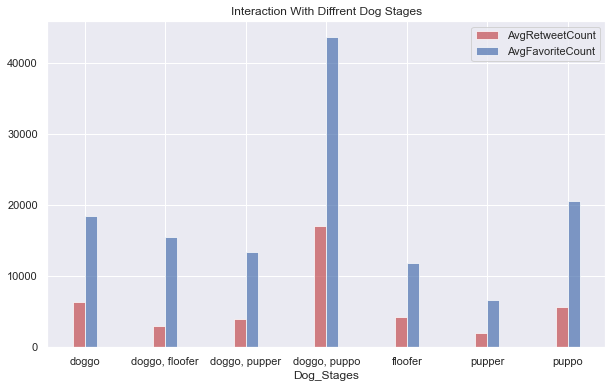

In [439]:
#Calculate avg of retweets and favorites to plot bar chart of interaction with dog stages
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
AvgRetweetCount_DogStage=twitter_archive_master.groupby('dog_stage').retweet_count.mean()
AvgFavoriteCount_DogStage=twitter_archive_master.groupby('dog_stage').favorite_count.mean()
ind=np.arange(len(AvgRetweetCount_DogStage))
width=0.15
retweet_bars=plt.bar(ind,AvgRetweetCount_DogStage,width,color='r',alpha=0.7,label='AvgRetweetCount')
favorite_bars=plt.bar(ind+width,AvgFavoriteCount_DogStage,width,color='b',alpha=0.7,label='AvgFavoriteCount')
plt.xlabel('Dog_Stages')
plt.title('Interaction With Diffrent Dog Stages')
locations=ind+width/2
labels=['doggo','doggo, floofer','doggo, pupper','doggo, puppo','floofer','pupper','puppo']
plt.xticks( locations,labels)
plt.legend()

###### Which Dog breed is most lovely to humans ?
- As per the horizontal bar it seems that 'golden_retriever' is the winner in tweets counter . 

([<matplotlib.axis.YTick at 0x112790e8>,
 [Text(0, 0, 'Chesapeake_Bay_retriever'),
  Text(0, 0, 'French_bulldog'),
  Text(0, 0, 'cocker_spaniel'),
  Text(0, 0, 'malamute'),
  Text(0, 0, 'toy_poodle'),
  Text(0, 0, 'Pomeranian'),
  Text(0, 0, 'Samoyed'),
  Text(0, 0, 'chow'),
  Text(0, 0, 'pug'),
  Text(0, 0, 'Chihuahua'),
  Text(0, 0, 'Pembroke'),
  Text(0, 0, 'Labrador_retriever'),
  Text(0, 0, 'golden_retriever')])

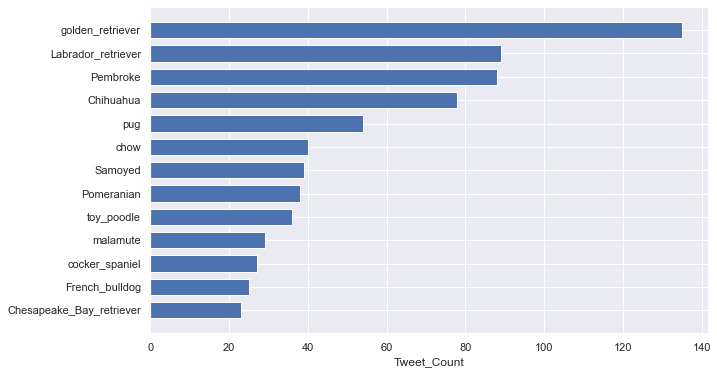

In [440]:
#plot horizontal bar for dog's breed vs tweet counts
breed_df=twitter_archive_master.query('(prediction_level==1) and (breed==True)')
b_dogs=breed_df.prediction.value_counts().sort_values(ascending=False)[12::-1]
y=np.arange(len(b_dogs))
width=0.7
plt.barh(y,b_dogs,width)
plt.xlabel('Tweet_Count')
labels=b_dogs.index
plt.yticks( y,labels)


##### What is the most used popular name ?
- ('Cooper','Charlie','Oliver','Tucker')

In [441]:
twitter_archive_master.query('(prediction_level==1) and (breed==True)').name.value_counts().sort_values(ascending=False)

Cooper      10
Charlie      9
Oliver       9
Tucker       8
Lucy         7
            ..
Colin        1
Pupcasso     1
Timber       1
Cermet       1
Suki         1
Name: name, Length: 759, dtype: int64

#### The relation between Rating Numerator and Retweet Count , and favorite count

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


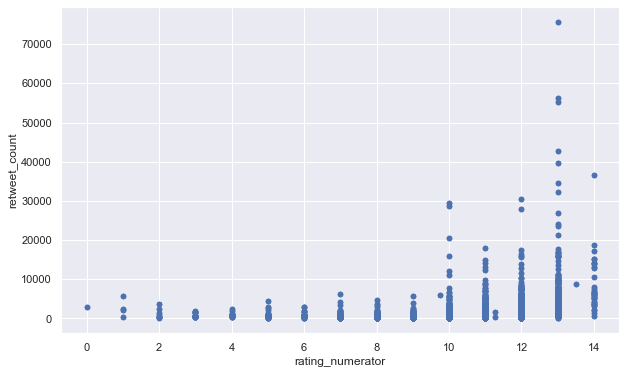

In [442]:
twitter_archive_master.plot(x='rating_numerator',y='retweet_count',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


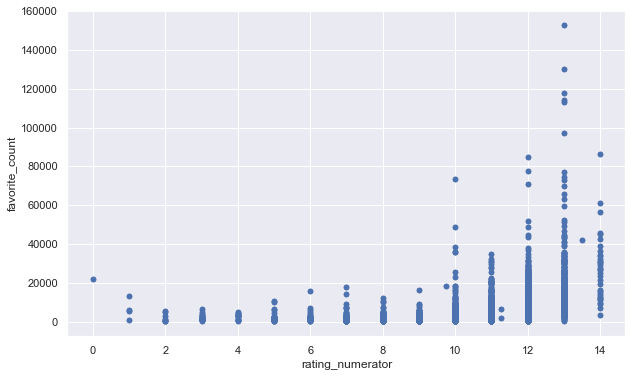

In [443]:
twitter_archive_master.plot(x='rating_numerator',y='favorite_count',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


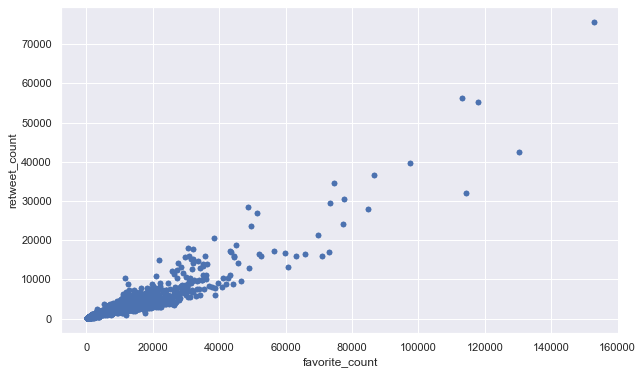

In [444]:
twitter_archive_master.plot(x='favorite_count',y='retweet_count',kind='scatter')

In [445]:
twitter_archive_master['retweet_count'].max() , twitter_archive_master['favorite_count'].max()

(75671.0, 152886.0)

In [446]:
twitter_archive_master.query('retweet_count==75671 and favorite_count==152886')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
2277,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,152886.0,75671.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,1,Labrador_retriever,0.825333,True
2278,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,152886.0,75671.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,2,ice_bear,0.044681,False
2279,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,152886.0,75671.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,3,whippet,0.018442,True
